# BeautifulSoup Exercise (adapted from Codecademy)

In this short experiment, I will scrape the database of chocolate bars available at the wonderful website [FlavorsOfCacao](http://flavorsofcacao.com/index.html), in order to try out some simple data analysis experiments and visualizations.


Import libraries. Fetch webpage using `requests`.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

cacao_table = requests.get("http://flavorsofcacao.com/database.html")

Create BeautifulSoup object using html parser.

In [2]:
soup = BeautifulSoup(cacao_table.content, "html.parser")

Create a list for "ratings"; ratings is the value (`.string`) in the last cell (`<td>`, `[-1]`) of every row (`<tr>`) excluding the first one (`[1:]`).

In [3]:
ratings = [float(row.find_all("td")[-1].string) for row in soup.find_all("tr")[1:]]

Create a list for "companies"; companies is the value (`.string`) in the second cell (`<td>`, `[1]`) of every row (`<tr>`) excluding the first one (`[1:]`).

In [4]:
companies = [row.find_all("td")[1].string.strip() for row in soup.find_all("tr")[1:]]

Let's create a list for "cocoa percentages" as well. Works similarly to what we have done so far: grab the value (`.string`) from the fourth to last cell (`<td>`, `[-4]`) in every row (`<tr>`) except for the first one (`[1:]`). However, I also want to turn this value into a `float`, after having stripped (`.strip()`) the `%` sign from it.

In [5]:
cocoa_percentages = [float(row.find_all("td")[-4].string.strip("%")) for row in soup.find_all("tr")[1:]]

Let's plot the ratings in the database.

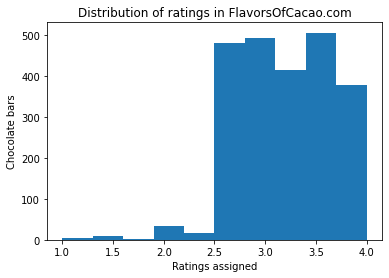

<Figure size 432x288 with 0 Axes>

In [6]:
plt.hist(ratings)
plt.title("Distribution of ratings in FlavorsOfCacao.com")
plt.ylabel("Chocolate bars")
plt.xlabel("Ratings assigned")
plt.show()
plt.clf()

Let's create a pandas DataFrame that combines the names of the companies and the respective ratings, in order to assess which companies have the best and worst ratings.

In [7]:
company_ratings = pd.DataFrame(
  {"Company": companies,
  "Ratings": ratings
  }
)
print(company_ratings.head())

    Company  Ratings
0      5150     3.75
1      5150     3.50
2      5150     3.25
3  A. Morin     3.75
4  A. Morin     3.50


Let's create a top 10 of the companies with the best ratings.

In [8]:
ratings_by_company = company_ratings.groupby("Company").Ratings.mean()
print(ratings_by_company.nlargest(10))

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Dole (Guittard)                         3.750000
Kerchner                                3.750000
Name: Ratings, dtype: float64


Now let's add the percentages of cocoa to the first table that we have created, in order to establish whether there's a relationship between the percentage of cocoa and the rating assigned to each bar.

In [9]:
company_ratings["CocoaPercentage"] = cocoa_percentages
print(company_ratings.head())

    Company  Ratings  CocoaPercentage
0      5150     3.75             76.0
1      5150     3.50             76.0
2      5150     3.25             76.0
3  A. Morin     3.75             63.0
4  A. Morin     3.50             70.0


Let's use a Scatterplot to visualize this relationship.

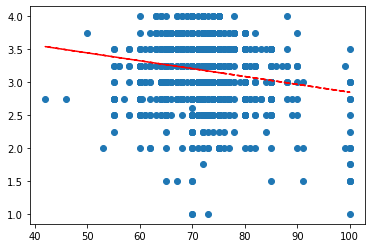

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(company_ratings.CocoaPercentage, company_ratings.Ratings)
z = np.polyfit(company_ratings.CocoaPercentage, company_ratings.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(company_ratings.CocoaPercentage, line_function(company_ratings.CocoaPercentage), "r--")
plt.show()
plt.clf()

Doesn't seem self-explanatory at all. If anything, it seems to suggest that a higher percentage of cocoa in the bar results in a worse product.